In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1

In [3]:
def calculatePercentiles(df, modelName):
    print("="*50)
    print(modelName)
    print("="*50)
    print("Max : ",df['run'].max())
    print("Min : ",df['run'].min())
    print("Median : ",df['run'].median())
    print("90th Percentile: ",df['run'].quantile(0.90))
    print("95th Percentile: ",df['run'].quantile(0.95))
    print("99th Percentile: ",df['run'].quantile(0.99))

def getModelName(folder):
    name = folder.split("_")[1][-1]
    if name == "n":
        name = "Nano"
    elif name == "m":
        name = "Medium"
    elif name == "x":
        name = "X-Large"
    return name


df_combined=pd.DataFrame()


category = "YOLOv8"
print("="*50)
print("="*50)
print(category)
print("="*50)
for folder in ["scratch_yolov8n_100_epochs", "scratch_yolov8m_100_epochs", "scratch_yolov8x_100_epochs"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/4090_outputs/{category}/{folder}/output_inference_time/resized.csv")
    df_temp['run']*=1000
    df_temp = df_temp[df_temp['run'] <= df_temp['run'].quantile(0.99)]
    modelName = getModelName(folder)
    df_temp["model"] = modelName
    df_temp["category"] = category
    calculatePercentiles(df_temp, modelName)
    df_combined = pd.concat([df_combined, df_temp[["run", "model", "category"]]])

category = "YOLOv11"
print("="*50)
print("="*50)
print(category)
print("="*50)
for folder in ["scratch_yolov11n_100_epochs", "scratch_yolov11m_100_epochs", "scratch_yolov11x_100_epochs"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/4090_outputs/{category}/{folder}/output_inference_time/resized.csv")
    df_temp['run']*=1000
    df_temp = df_temp[df_temp['run'] <= df_temp['run'].quantile(0.99)]
    modelName = getModelName(folder)
    df_temp["model"] = modelName
    df_temp["category"] = category
    calculatePercentiles(df_temp, modelName)
    df_combined = pd.concat([df_combined, df_temp[["run", "model", "category"]]])



df_combined.reset_index(drop=True, inplace=True)
# print(df_combined.head(10))
# print(df_combined.tail(10))
# print("Total rows : ",len(df_combined))

YOLOv8
Nano
Max :  4.3065547943115
Min :  3.2322406768797998
Median :  3.87549400329585
90th Percentile:  4.17795181274406
95th Percentile:  4.2231082916259
99th Percentile:  4.278950691223102
Medium
Max :  7.820606231689399
Min :  7.0164203643798
Median :  7.55333900451655
90th Percentile:  7.7657699584960005
95th Percentile:  7.78489112854002
99th Percentile:  7.804577350616407
X-Large
Max :  20.2796459197998
Min :  19.496202468872
Median :  19.971370697021403
90th Percentile:  20.032429695129313
95th Percentile:  20.047318935394205
99th Percentile:  20.125355720519938
YOLOv11
Nano
Max :  5.582571029663
Min :  4.1496753692626
Median :  4.72581386566155
90th Percentile:  5.293250083923249
95th Percentile:  5.37105798721309
99th Percentile:  5.478374958038239
Medium
Max :  7.1227550506591
Min :  6.2410831451416
Median :  6.7970752716064
90th Percentile:  7.01932907104492
95th Percentile:  7.058775424957215
99th Percentile:  7.08510875701901
X-Large
Max :  15.0489807128906
Min :  14.262

### Monodepth

In [4]:
def calculatePercentiles(df):
    print("="*50)
    print("Max : ",df['run'].max())
    print("Min : ",df['run'].min())
    print("Median : ",df['run'].median())
    print("90th Percentile: ",df['run'].quantile(0.90))
    print("95th Percentile: ",df['run'].quantile(0.95))
    print("99th Percentile: ",df['run'].quantile(0.99))
    print("="*50)

df1=pd.read_csv("/home/drone/Downloads/IPDPS/4090_outputs/4090_monodepth_output.csv")

df1['run'] = df1['run_time']*1000

# Dropping max value
df1=df1.loc[df1['run']!=df1['run'].max()]

df1["model"] = "Monodepth2"
df1["category"] = "Monodepth2"

calculatePercentiles(df1)

df_combined = pd.concat([df_combined, df1[["run", "model", "category"]]])

Max :  7.379055023193301
Min :  5.6118965148925
Median :  5.9843063354492
90th Percentile:  6.2336921691894
95th Percentile:  6.27720355987545
99th Percentile:  6.40184879302973


### Bodypose

In [5]:
def calculatePercentiles(df):
    print("="*50)
    print("Max : ",df['run'].max())
    print("Min : ",df['run'].min())
    print("Median : ",df['run'].median())
    print("90th Percentile: ",df['run'].quantile(0.90))
    print("95th Percentile: ",df['run'].quantile(0.95))
    print("99th Percentile: ",df['run'].quantile(0.99))
    print("="*50)

In [6]:
df1=pd.read_csv("/home/drone/Downloads/IPDPS/outputs_bodypose/4090_bodypose_output.csv")

df1['detection_time'] *=1000
df1['classifier_time'] *=1000
df1['run'] = df1['detection_time'] + df1['classifier_time']

# Dropping max value
df1=df1.loc[df1['run']!=df1['run'].max()]

df1["model"] = "Bodypose"
df1["category"] = "Bodypose"

calculatePercentiles(df1)

df_combined = pd.concat([df_combined, df1[["run", "model", "category"]]])

Max :  2.9413700103758997
Min :  2.1729469299316015
Median :  2.2530555725097012
90th Percentile:  2.3515224456787003
95th Percentile:  2.385735511779751
99th Percentile:  2.4366855621337216


### Plotting

In [7]:
df_combined.reset_index(drop=True, inplace=True)

In [8]:
print(df_combined.head(10))

        run model category
0  4.279375  Nano   YOLOv8
1  3.817797  Nano   YOLOv8
2  3.756285  Nano   YOLOv8
3  4.068136  Nano   YOLOv8
4  4.073858  Nano   YOLOv8
5  3.719807  Nano   YOLOv8
6  3.898382  Nano   YOLOv8
7  4.171848  Nano   YOLOv8
8  3.749847  Nano   YOLOv8
9  3.724575  Nano   YOLOv8


In [9]:
print(df_combined.groupby(["model", "category"]).size())

model       category  
Bodypose    Bodypose      1191
Medium      YOLOv11        990
            YOLOv8         990
Monodepth2  Monodepth2    1191
Nano        YOLOv11        990
            YOLOv8         990
X-Large     YOLOv11        990
            YOLOv8         990
dtype: int64


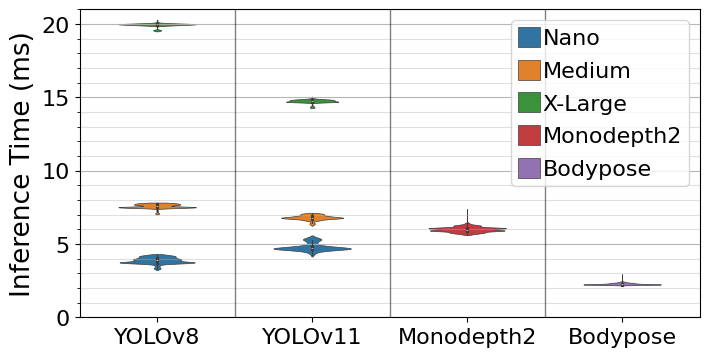

In [10]:
font_size = 16
# Create the violin plot
plt.figure(figsize=(8, 4))  # Reduce width of figure to make x-ticks closer

ax = sns.violinplot(
    x='category', 
    y='run', 
    hue='model', 
    data=df_combined, 
    inner='box', 
    width=0.5,  # Reduce violin width for tighter spacing
    linewidth=0.5,
    dodge=False,  
    cut=0  # Avoids extending violins beyond data range
)

# Add a legend
plt.legend(loc="upper right", fontsize=16, ncol = 1, borderpad=0.3,
           handletextpad=0.1, borderaxespad=0.5, columnspacing=0.5)

# Set title and labels
plt.ylabel("Inference Time (ms)", fontsize=19)
plt.xlabel("", fontsize=font_size)

# Customize Y-axis
plt.ylim(0, 21)  
ax.set_yticks(np.arange(0, 21, 5))
ax.tick_params(axis='x', which='minor', bottom=False)
ax.yaxis.set_tick_params(labelsize=font_size)
ax.xaxis.set_tick_params(labelsize=font_size)

# Add grid
ax.grid(which='minor', axis='y', linestyle='-', alpha=0.4)
ax.grid(which='major', axis='y', linestyle='-', alpha=0.9)
plt.minorticks_on()

# # Reduce X-tick spacing by manually setting positions
xticks = ax.get_xticks()
# xticks = [0, 0.8, 1.6]  # Manually set positions
# plt.xticks(xticks, ax.get_xticklabels(), rotation=0, ha="center")

# 🔹 Add vertical lines between categories
for i in range(len(xticks) - 1):
    midpoint = (xticks[i] + xticks[i + 1]) / 2
    ax.axvline(midpoint, color='black', linestyle='-', alpha=0.5, linewidth=1)

# Adjust spacing to make it tighter
# plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
# plt.margins(0.005)

# Save and show plot
# plt.tight_layout()
out_path = "/home/drone/Downloads/IPDPS/4090_outputs/"
outfile = out_path + "scratch_yolo_4090_violin_all"
plt.savefig(outfile+".png", bbox_inches='tight')
plt.savefig(outfile+".pdf", format='pdf', bbox_inches='tight', dpi=700)

plt.show()